### #2

Kaggle competition: https://www.kaggle.com/competitions/titanic/

Entry by Robin P.M. Kras

In [65]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Problem Understanding

The problem is being described as building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data Exploration

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are dealing with a variety of features.
- Categorical variables: P(assenger)class (ticket class), sex, embarked
- Numerical variables: Cabin number, ticket number, number of siblings / spouses aboard, number of parents / children aboard, and passenger fare.

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Between all of these variables we will remove: name and passengerid (only useful for the final assessment in combination with 'Survived').

In [68]:
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train.shape

(891, 11)

([<matplotlib.patches.Wedge at 0x24755068d10>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

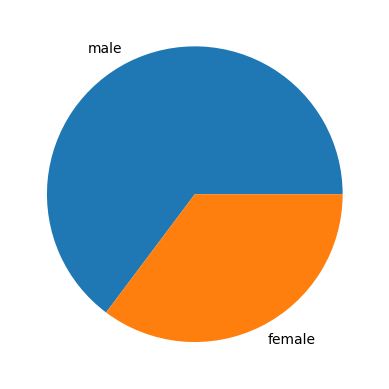

In [71]:
import matplotlib.pyplot as plt

sex_counts = train['Sex'].value_counts()

fig, ax = plt.subplots()
ax.pie(sex_counts, labels=sex_counts.index)

Hypothesis: There are more men than women aboard of the Titanic. Does this mean that more men will survive this tragedy?

([<matplotlib.patches.Wedge at 0x2475509b110>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')])

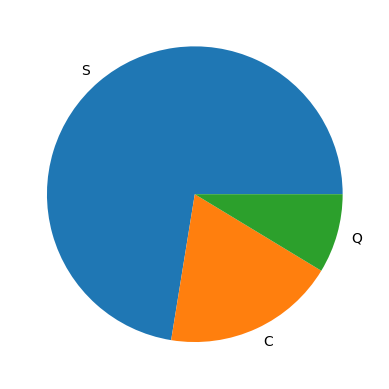

In [72]:
embarked_counts = train['Embarked'].value_counts()

fig, ax = plt.subplots()
ax.pie(embarked_counts, labels=embarked_counts.index)

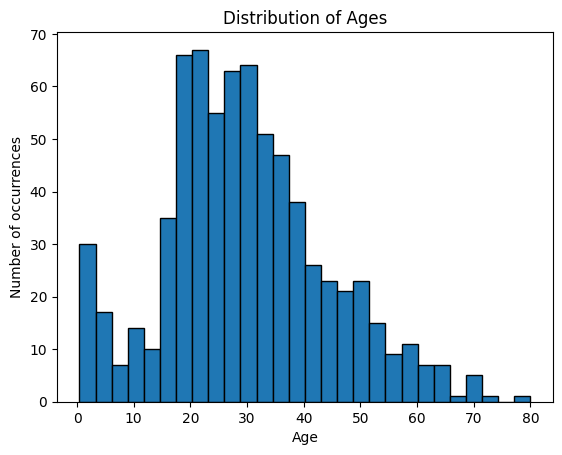

In [73]:
plt.hist(train['Age'], bins=28, edgecolor='black') 

plt.xlabel('Age')
plt.ylabel('Number of occurrences')
plt.title('Distribution of Ages')
plt.show()

From this age distribution, we can tell that a large majority of the passengers were aged >=18. Although there are also a significant amount of babies. This likely implies that age is going to play a large role in whether a passenger survives.

In [74]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Data Preprocessing

In [75]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test set, null count: 
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


A variety of passengers do not have cabins assigned to their tickets. Does this imply that these passengers did not have a room assigned to them? For convenience sake, I will assign these people with a room on the lower-end deck (G). 

In [76]:
train['Cabin'] = train['Cabin'].fillna('G')
test['Cabin'] = test['Cabin'].fillna('G')

As for the age, since it is a numerical variable, we take the mean of all ages for the missing ages.

In [77]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(train['Age'].mean())

In [78]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


Test set, null count: 
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


This leaves us with a singular instance of the fare missing, as well as two people having no clear embark origins. For the missing embarked values, we will use the median and for the fare the mean.

In [79]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].median)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [80]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Test set, null count: 
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [81]:
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')

train['Fare'] = train['Fare'].astype('int64')
test['Fare'] = test['Fare'].astype('int64')

Perfect! Now that we got rid of all missing values, we can continue to Feature Engineering.

In [82]:
train.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [83]:
train['Embarked'].value_counts()

Embarked
S                                                                                                                                                                                           644
C                                                                                                                                                                                           168
Q                                                                                                                                                                                            77
<bound method Series.median of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: count, dtype: int64

In [84]:
# Mapping 'Sex' column to 0 (male) and 1 (female)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Mapping 'Embarked' column to 0 (S) and 1 (C) and 2 (Q)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# We only want the first indicator of the ship, this will likely be the most relevant since the lower half of a ship will arguably flood faster
train['Cabin'] = train['Cabin'].astype(str).str[0]
test['Cabin'] = test['Cabin'].astype(str).str[0]

In [85]:
train['FamilyMatters'] = train['Parch'] + train['SibSp']
test['FamilyMatters'] = test['Parch'] + test['SibSp']

# Beyond this, we can also verify whether the age matters in relation to the fare ticket and cabin number

train['Wealth'] = train['Age'] + train['Fare']
test['Wealth'] = test['Age'] + test['Fare']

# Last, it may be smart to verify whether age and sex have something to do with each other

train['AgeSex'] = train['Age'] + train['Sex']
test['AgeSex'] = test['Age'] + test['Sex']

In [86]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMatters,Wealth,AgeSex
0,1,0,3,0,22,1,0,A/5 21171,7,G,0.0,1,29,22
1,2,1,1,1,38,1,0,PC 17599,71,C,1.0,1,109,39
2,3,1,3,1,26,0,0,STON/O2. 3101282,7,G,0.0,0,33,27
3,4,1,1,1,35,1,0,113803,53,C,0.0,1,88,36
4,5,0,3,0,35,0,0,373450,8,G,0.0,0,43,35


In [87]:
# Now, we remove the unwanted column of Ticket

train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

In [88]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilyMatters,Wealth,AgeSex
0,892,3,0,34,0,0,7,G,2,0,41,34
1,893,3,1,47,1,0,7,G,0,1,54,48
2,894,2,0,62,0,0,9,G,2,0,71,62
3,895,3,0,27,0,0,8,G,0,0,35,27
4,896,3,1,22,1,1,12,G,0,2,34,23


Using 'get_dummies()' restricts multicolinearity

In [89]:
train = pd.get_dummies(train, columns=['Cabin'], drop_first=True)
test = pd.get_dummies(test, columns=['Cabin'], drop_first=True)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMatters,Wealth,AgeSex,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,0,22,1,0,7,0.0,1,29,22,False,False,False,False,False,True,False
1,2,1,1,1,38,1,0,71,1.0,1,109,39,False,True,False,False,False,False,False
2,3,1,3,1,26,0,0,7,0.0,0,33,27,False,False,False,False,False,True,False
3,4,1,1,1,35,1,0,53,0.0,1,88,36,False,True,False,False,False,False,False
4,5,0,3,0,35,0,0,8,0.0,0,43,35,False,False,False,False,False,True,False


Excellent, now we will move forward by selecting the model for this task

### Model Selection

Considering that the task is about binary classification, we can employ a multitude of models and get (relative) good performance. I decided to use Random Forest.

In [91]:
X = train.drop(columns=['PassengerId', 'Survived'])
y = train['Survived']  

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
y_pred = rf.predict(X_val)

In [95]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Extra: a small portion of hyperparameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [97]:
# Retrain using best parameters

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [98]:
y_pred = rf.predict(X_val)

In [99]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Forgot to make sure all decks are equal per test and train data~!

In [100]:
test['Cabin_T'] = False

In [101]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMatters,Wealth,AgeSex,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,892,3,0,34,0,0,7,2,0,41,34,False,False,False,False,False,True,False
1,893,3,1,47,1,0,7,0,1,54,48,False,False,False,False,False,True,False
2,894,2,0,62,0,0,9,2,0,71,62,False,False,False,False,False,True,False
3,895,3,0,27,0,0,8,0,0,35,27,False,False,False,False,False,True,False
4,896,3,1,22,1,1,12,0,2,34,23,False,False,False,False,False,True,False


In [102]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMatters,Wealth,AgeSex,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,0,22,1,0,7,0.0,1,29,22,False,False,False,False,False,True,False
1,2,1,1,1,38,1,0,71,1.0,1,109,39,False,True,False,False,False,False,False
2,3,1,3,1,26,0,0,7,0.0,0,33,27,False,False,False,False,False,True,False
3,4,1,1,1,35,1,0,53,0.0,1,88,36,False,True,False,False,False,False,False
4,5,0,3,0,35,0,0,8,0.0,0,43,35,False,False,False,False,False,True,False


In [103]:
val_predictions = rf.predict(X_val)

In [104]:
X_test = test.drop(columns=['PassengerId']) 
test_predictions = rf.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],  
    'Survived': test_predictions  
})

submission_df['Survived'] = submission_df['Survived']

# Save CSV file
submission_df.to_csv('submission.csv', index=False)

NameError: name 'test' is not defined

Final submission score of 76.315%, not bad!

It can be argued that having a higher accuracy would not make sense, since it would be too hard to predict who will live and who will die in such a catastrophic event full of panic and dread.